In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather_data = pd.read_csv('weather_station_data.csv')
weather_data.head()

,Date,Time,Temperature (F),Humidity (%)
0,"Friday, November 15",5:00 AM,56,92
1,"Friday, November 15",6:00 AM,56,85
2,"Friday, November 15",7:00 AM,57,82
3,"Friday, November 15",8:00 AM,57,78
4,"Friday, November 15",9:00 AM,57,78


In [4]:
#Format 'Date' and combine with 'Time' to create a 'Datetime' column
weather_data['Formatted Date'] = pd.to_datetime(
    weather_data['Date'] + ', 2024',  
    format='%A, %B %d, %Y'  
)
weather_data['Datetime'] = pd.to_datetime(weather_data['Formatted Date'].dt.strftime('%Y-%m-%d') + ' ' + weather_data['Time'])

In [5]:
#Extract the day for grouping
weather_data['Day'] = weather_data['Datetime'].dt.date

#Calculate daily stats: mean, max, min
daily_stats = weather_data.groupby('Day').agg({
    'Temperature (F)': ['mean', 'max', 'min'],
    'Humidity (%)': ['mean', 'max', 'min']
})
daily_stats.columns = ['Temp Mean', 'Temp Max', 'Temp Min', 'Humidity Mean', 'Humidity Max', 'Humidity Min']

#Reset index for easier plotting
daily_stats.reset_index(inplace=True)


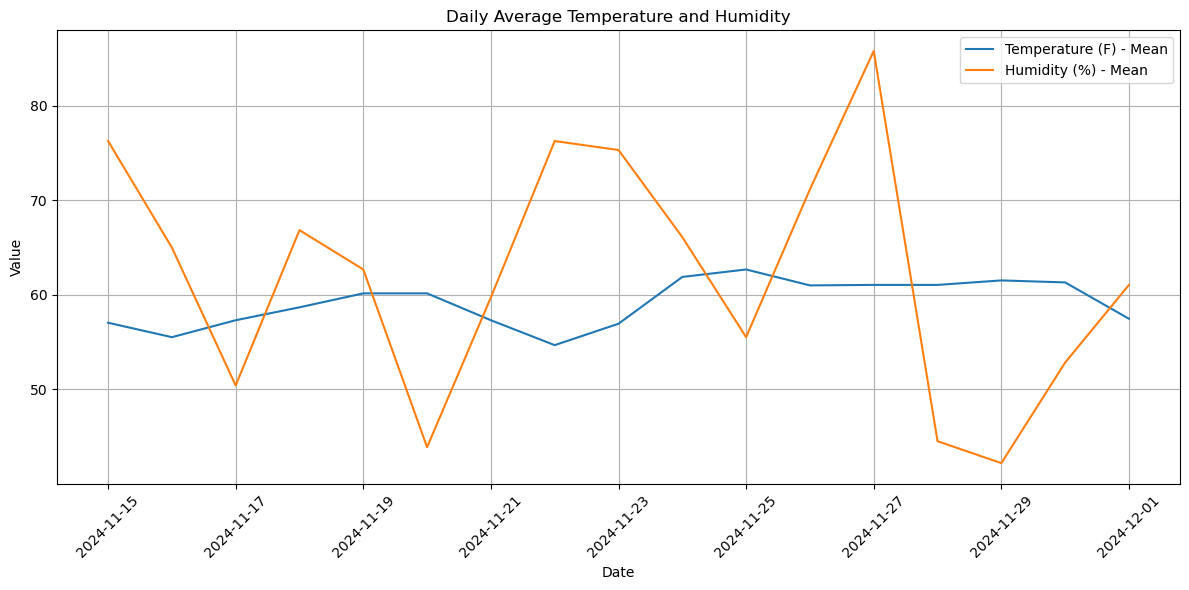

In [6]:
#Plot Daily Averages
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Temp Mean', data=daily_stats, label='Temperature (F) - Mean')
sns.lineplot(x='Day', y='Humidity Mean', data=daily_stats, label='Humidity (%) - Mean')
plt.title('Daily Average Temperature and Humidity')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

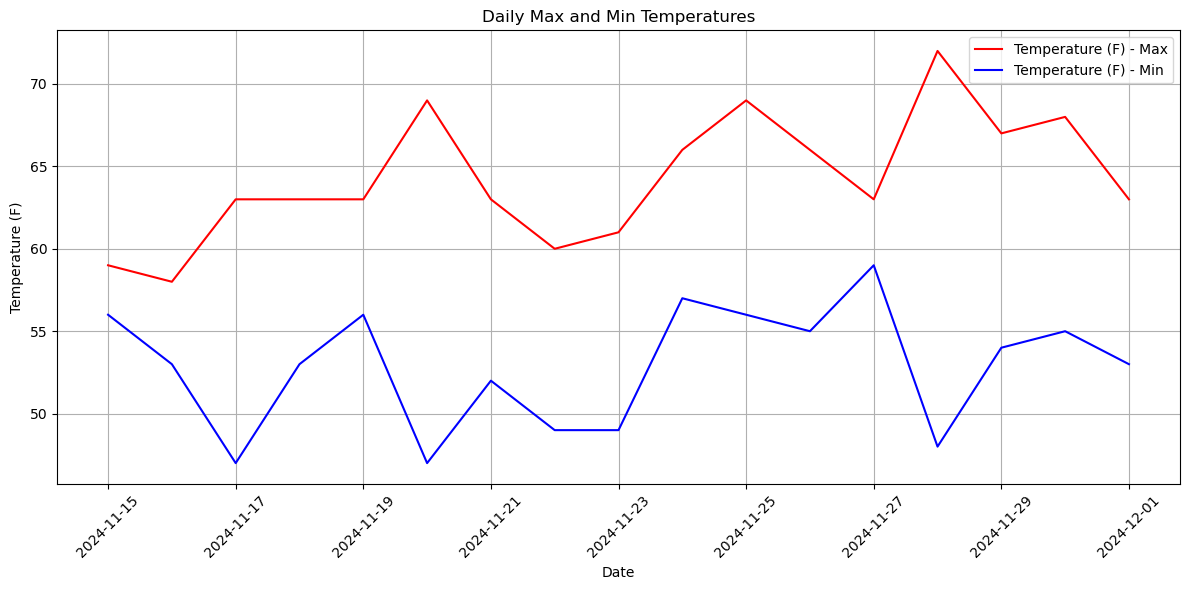

Day with highest temperature: 2024-11-28 (72°F)


In [7]:
#Plot Daily Max/Min Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Temp Max', data=daily_stats, label='Temperature (F) - Max', color='red')
sns.lineplot(x='Day', y='Temp Min', data=daily_stats, label='Temperature (F) - Min', color='blue')
plt.title('Daily Max and Min Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Annotate the day with highest temperature
max_temp_day = daily_stats.loc[daily_stats['Temp Max'].idxmax()]
print(f"Day with highest temperature: {max_temp_day['Day']} ({max_temp_day['Temp Max']}°F)")

In [8]:
#Extract the hour for grouping
weather_data['Hour'] = weather_data['Datetime'].dt.hour

#Calculate hourly average temperature and humidity
hourly_stats = weather_data.groupby('Hour').agg({
    'Temperature (F)': 'mean',
    'Humidity (%)': 'mean'
})
hourly_stats.reset_index(inplace=True)

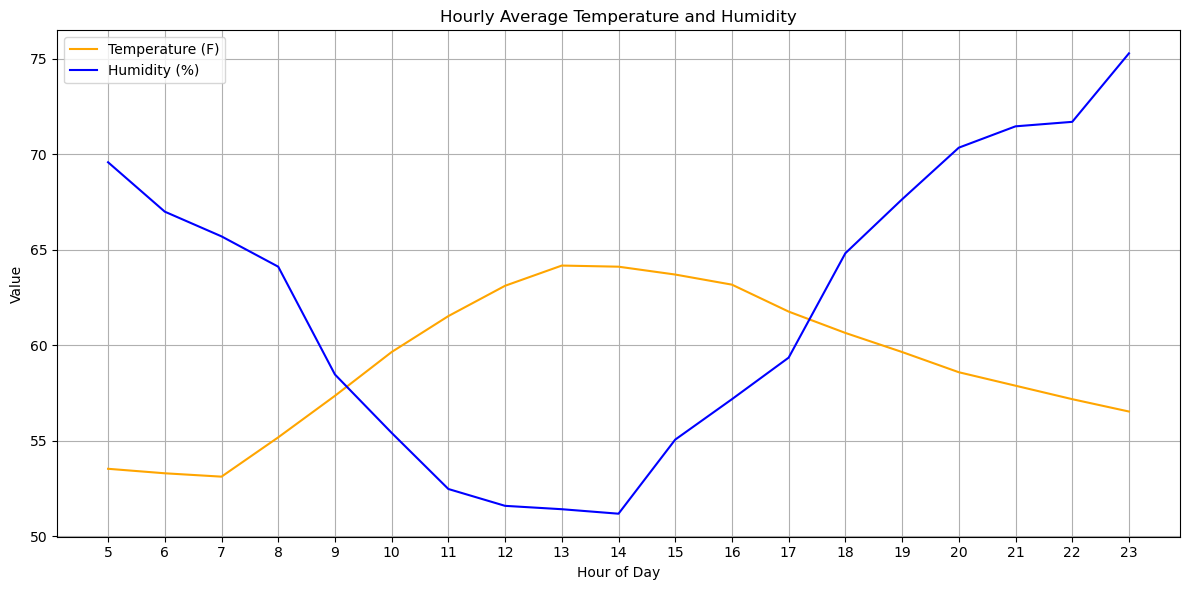

In [9]:
#Plot Hourly Average Temperature and Humidity
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Temperature (F)', data=hourly_stats, label='Temperature (F)', color='orange')
sns.lineplot(x='Hour', y='Humidity (%)', data=hourly_stats, label='Humidity (%)', color='blue')
plt.title('Hourly Average Temperature and Humidity')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.xticks(range(5, 24), labels=range(5, 24))  # Show only active hours
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

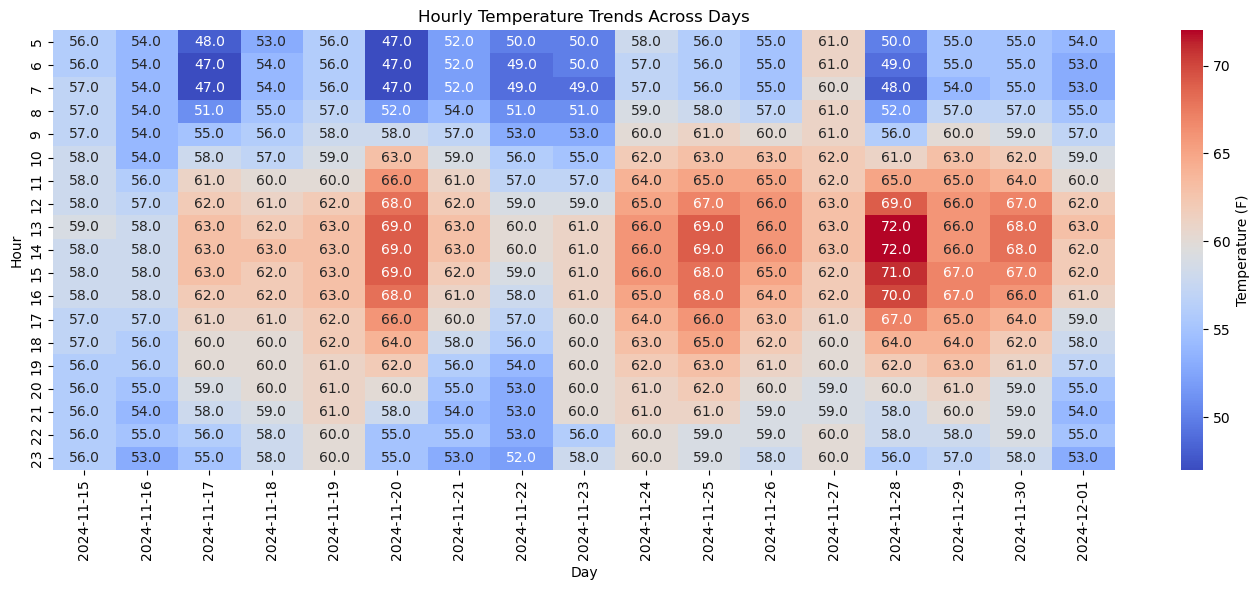

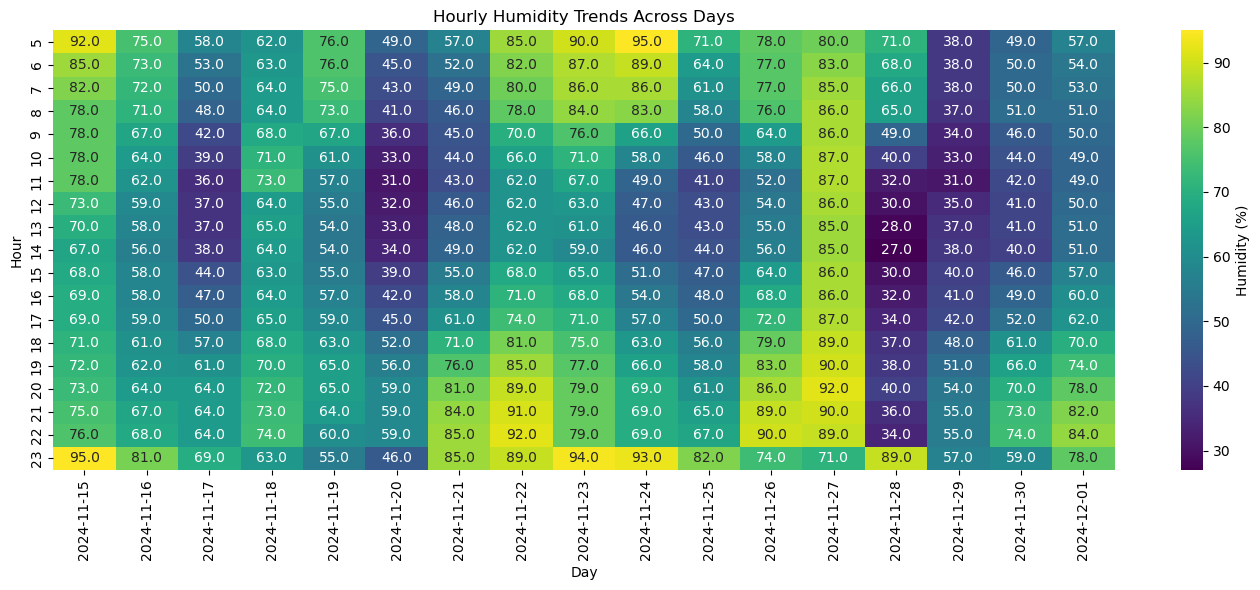

The hour with the highest average temperature is 13.0 (64.17647058823529°F).
The hour with the highest average humidity is 23.0 (75.29411764705883%).


In [10]:
#Heatmap of Hourly Variation Across Days
#Pivot table for heatmap: rows = hours, columns = days
hourly_heatmap_data = weather_data.pivot_table(
    index='Hour', 
    columns='Day', 
    values=['Temperature (F)', 'Humidity (%)']
)

#Plot Heatmap for Temperature
plt.figure(figsize=(14, 6))
sns.heatmap(hourly_heatmap_data['Temperature (F)'], cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature (F)'})
plt.title('Hourly Temperature Trends Across Days')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

#Plot Heatmap for Humidity
plt.figure(figsize=(14, 6))
sns.heatmap(hourly_heatmap_data['Humidity (%)'], cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Humidity (%)'})
plt.title('Hourly Humidity Trends Across Days')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

#Find the hour with highest average temperature and humidity
max_temp_hour = hourly_stats.loc[hourly_stats['Temperature (F)'].idxmax()]
max_humidity_hour = hourly_stats.loc[hourly_stats['Humidity (%)'].idxmax()]

print(f"The hour with the highest average temperature is {max_temp_hour['Hour']} ({max_temp_hour['Temperature (F)']}°F).")
print(f"The hour with the highest average humidity is {max_humidity_hour['Hour']} ({max_humidity_hour['Humidity (%)']}%).")

Correlation coefficient between Temperature and Humidity: -0.45


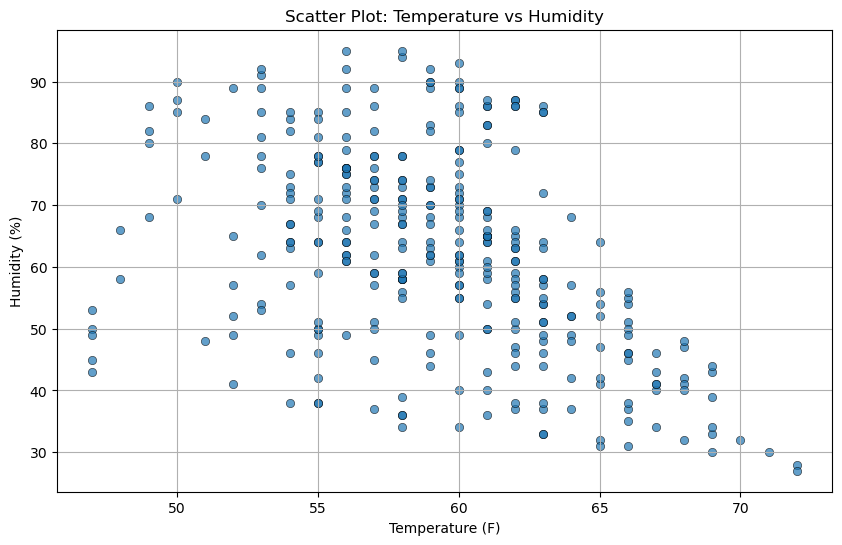

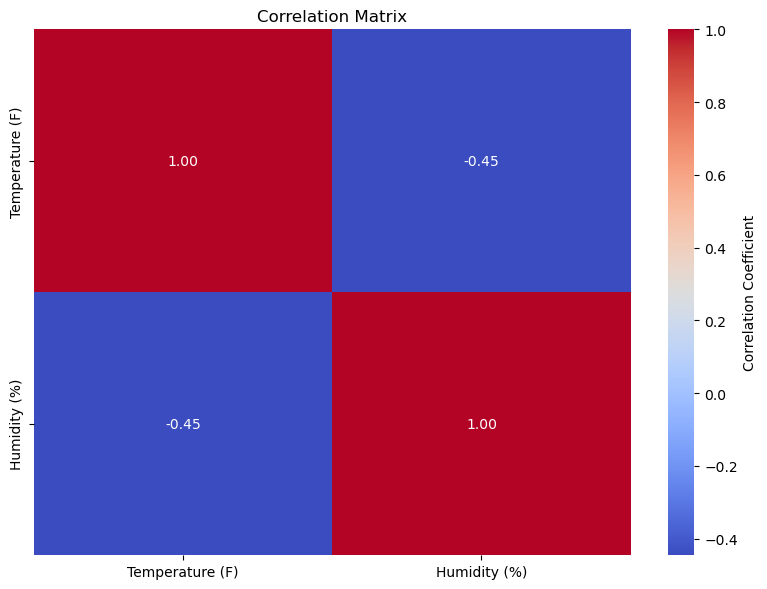

In [11]:
# Compute the correlation coefficient between temperature and humidity
correlation = weather_data['Temperature (F)'].corr(weather_data['Humidity (%)'])
print(f"Correlation coefficient between Temperature and Humidity: {correlation:.2f}")

# Scatter Plot for Temperature vs Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Temperature (F)', 
    y='Humidity (%)', 
    data=weather_data, 
    alpha=0.7, 
    edgecolor='k'
)
plt.title('Scatter Plot: Temperature vs Humidity')
plt.xlabel('Temperature (F)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Heatmap for Correlation Matrix
# Select relevant columns
relevant_data = weather_data[['Temperature (F)', 'Humidity (%)']]
correlation_matrix = relevant_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [48]:
#Comparing our results with Official Reports
#read the csv file
official_data = pd.read_csv("San Diego Temps.csv")
official_data

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-15,50.0,58.0,45.0
1,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-16,50.0,60.0,43.0
2,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-17,53.0,66.0,42.0
3,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-18,53.0,64.0,46.0
4,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-19,56.0,72.0,42.0
...,...,...,...,...,...,...
664,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-24,61.0,66.0,55.0
665,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-25,60.0,73.0,51.0
666,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-26,61.0,69.0,51.0
667,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-27,62.0,NaN,NaN


In [49]:
#Clean the data to remove entries without Temp values
filtered = official_data.dropna(subset=['TMAX'])
#remove TAVG column as we will be making our own as some entries to not calculate it
filtered = filtered.drop(columns=['TAVG'])
filtered

,STATION,NAME,DATE,TMAX,TMIN
0,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-15,58.0,45.0
1,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-16,60.0,43.0
2,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-17,66.0,42.0
3,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-18,64.0,46.0
4,USR0000CGOO,"GOOSE VALLEY CALIFORNIA, CA US",2024-11-19,72.0,42.0
...,...,...,...,...,...
662,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-22,69.0,44.0
663,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-23,66.0,49.0
664,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-24,66.0,55.0
665,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2024-11-25,73.0,51.0


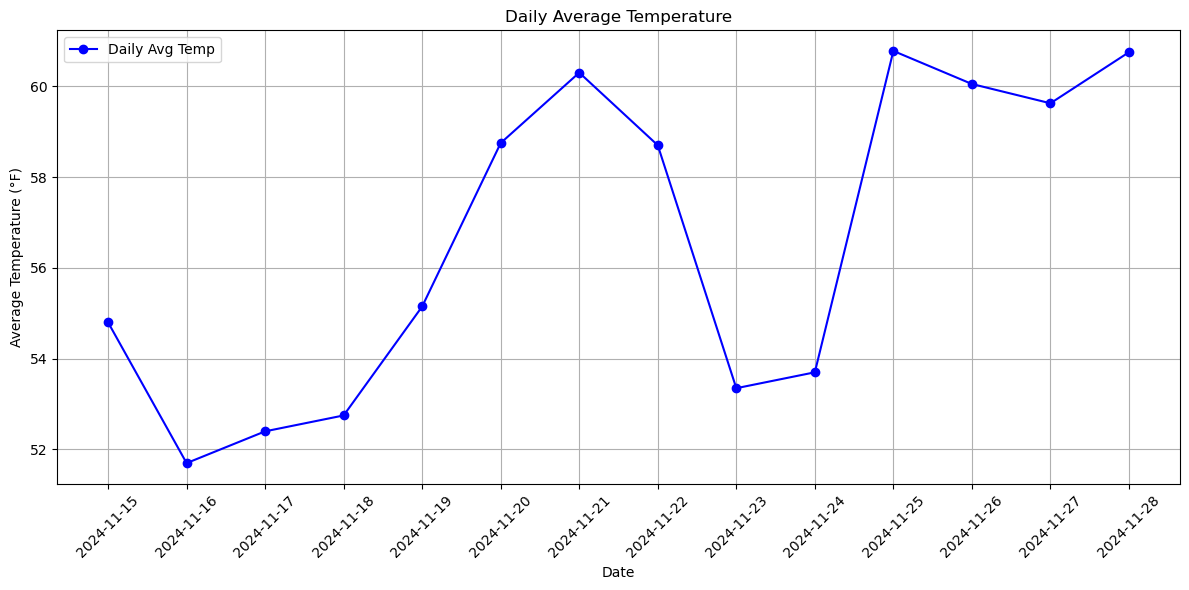

In [50]:
#Calculate the averages manually
filtered['TAVG'] = (filtered['TMAX'] + filtered['TMIN']) / 2

#Group by date the average temp
daily_avg = filtered.groupby('DATE')['TAVG'].mean()

#Plotting the daily average
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg, marker='o', linestyle='-', color='b', label='Daily Avg Temp')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

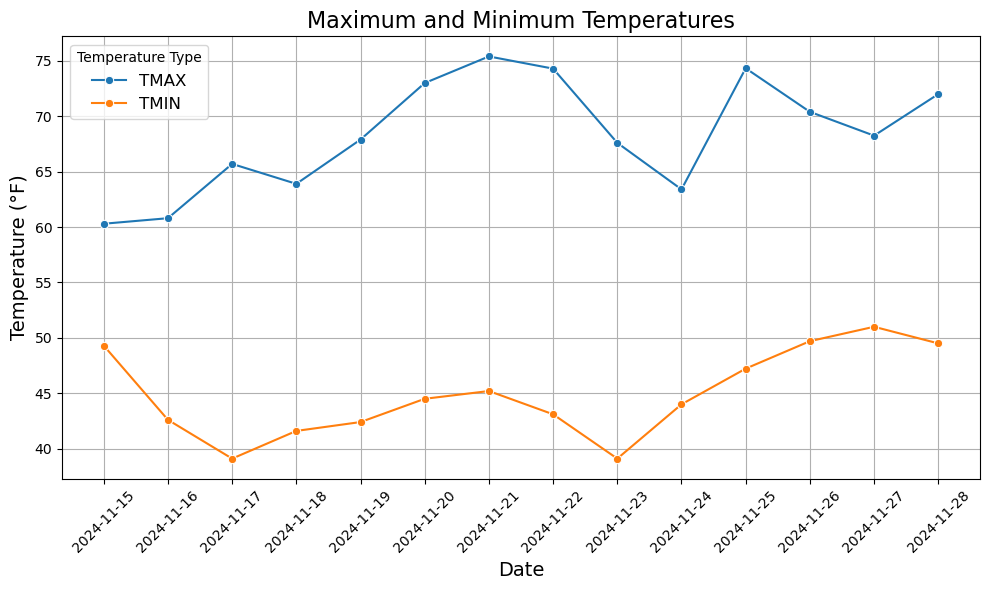

Day with the highest Temperature was 2024-11-21 with a temp of 82.0 °F


In [ ]:
#Plotting max and min Temps

melted_data = filtered.reset_index().melt(
        id_vars=['DATE'],
        value_vars=['TMAX', 'TMIN'],
        var_name='Temperature Type',
        value_name='Temperature'
    )
    
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x='DATE', y='Temperature', hue='Temperature Type', marker='o', errorbar=None)

plt.title('Maximum and Minimum Temperatures', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.legend(title='Temperature Type', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
max_day = filtered.loc[filtered['TMAX'].idxmax()]
print(f"Day with the highest Temperature was {max_day["DATE"]} with a temp of {max_day["TMAX"]} °F")


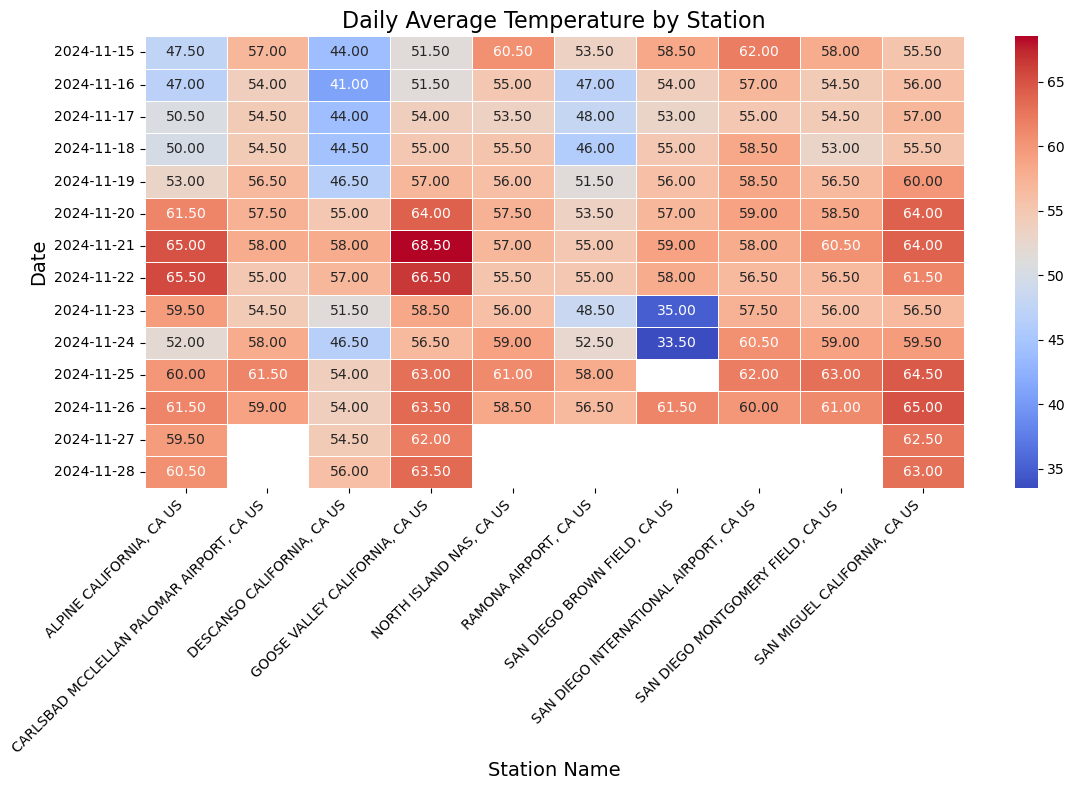

In [ ]:
#Heat Map showcasing daily Official Temperature
heatmap_data = filtered.pivot(index='DATE', columns='NAME', values='TAVG')
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,  # Display values in cells
    fmt=".1f",  # One decimal place
    cmap="coolwarm",  # Color palette
    linewidths=0.5  # Gridlines between cells
)

# Add Titles and Labels
plt.title("Daily Average Temperature by Station", fontsize=16)
plt.xlabel("Station Name", fontsize=14)
plt.ylabel("Date", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the Plot
plt.show()